In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Problem 1

The given graph can be constructed in Networkx as follows:

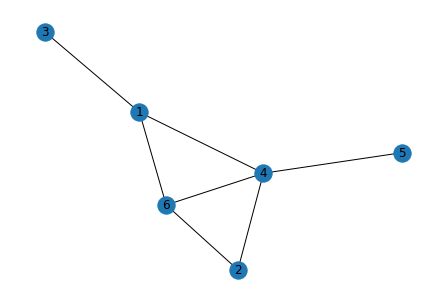

In [3]:
G = nx.Graph()
G.add_nodes_from(range(1, 7))
G.add_edges_from([
    (1, 6),
    (1, 3),
    (1, 4),
    (2, 4),
    (6, 2),
    (4, 6),
    (5, 4),
])
nx.draw(G, with_labels=True)

1. The degree of a node is the number of edges that contain that node. In our case, nodes 1 and 4 have degree 3 and 4, respectively.

In [4]:
G.degree([1, 4])

DegreeView({1: 3, 4: 4})

2. The shortest path from node 3 to node 5 is clearly 3 -> 1 -> 4 -> 5.

In [5]:
nx.shortest_path(G, source=3, target=5)

[3, 1, 4, 5]

3. In networkx, the edge list representation of a graph can be accessed with the edges() method.

In [6]:
G.edges()

EdgeView([(1, 6), (1, 3), (1, 4), (2, 4), (2, 6), (4, 6), (4, 5)])

4. An adjacency list can be computed in networkx by listing the neighbors of every node in the graph.

In [7]:
{node: list(nx.all_neighbors(G, node)) for node in G.nodes()}

{1: [6, 3, 4], 2: [4, 6], 3: [1], 4: [1, 2, 6, 5], 5: [4], 6: [1, 2, 4]}

5. Networkx will compute the adjacency matrix of a graph, and return it in a sparse representation. The todense() method can be used to display a regular matrix.

In [8]:
A = nx.adjacency_matrix(G)
A.todense()

matrix([[0, 0, 1, 1, 0, 1],
        [0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 0],
        [1, 1, 0, 1, 0, 0]])

6. One method to compute the degree matrix of a graph is to find the Laplacian, and then add the adjacency matrix.

In [9]:
L = nx.laplacian_matrix(G)
D = A + L
D.todense()

matrix([[3, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 3]])

Note that the degree matrix is a diagonal matrix, where each entry is the degree of a corresponding node.

In [10]:
[degree for _, degree in G.degree(range(1, 7))]

[3, 2, 1, 4, 1, 3]

7. The Laplacian was used above to compute the degree matrix.

In [11]:
L.todense()

matrix([[ 3,  0, -1, -1,  0, -1],
        [ 0,  2,  0, -1,  0, -1],
        [-1,  0,  1,  0,  0,  0],
        [-1, -1,  0,  4, -1, -1],
        [ 0,  0,  0, -1,  1,  0],
        [-1, -1,  0, -1,  0,  3]])

8. The incidence matrix can be computed with the line graph of G, or directly via a Networkx method.

In [12]:
C = nx.incidence_matrix(G)
C.todense()

array([[1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0.]])

11. A, D, and C are related by the identity: $A = C\cdot C^T - D$.

In [13]:
np.array_equal(A.todense(), (C @ C.transpose() - D).todense())

True

10. The line graph is found by converting each edge to a node, and adding an edge between each node pair corresponding to edges in the original graph that contained the same node. For example, node (2, 6) is connected to node (2, 4) because they were both edges that connected to node 2.

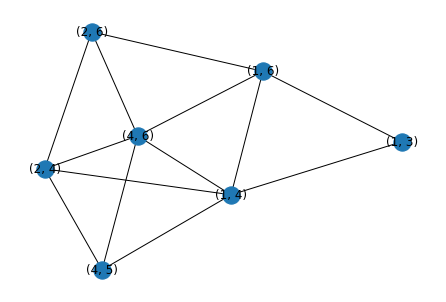

In [14]:
L = nx.line_graph(G)
nx.draw(L, with_labels=True)

-----------------------------------------------------
# Problem 2

A directed graph is constructed in the same way as an undirected one, except the order of the pairs given to add_edges() matters.

In [15]:
G = nx.DiGraph()
G.add_nodes_from(range(1, 7))
G.add_edges_from([
    (1, 3),
    (4, 1),
    (6, 1),
    (4, 2),
    (6, 2),
    (4, 5),
    (6, 4),
    (4, 6),
])

1. There are separate methods to compute in- and out-degree of nodes.

In [16]:
G.in_degree([2, 6]), G.out_degree([2, 6])

(InDegreeView({2: 2, 6: 1}), OutDegreeView({2: 0, 6: 3}))

2. By default, Networkx will compute shortest paths via Dijkstra's algorithm.

In [17]:
nx.shortest_path(G, source=4, target=3)

[4, 1, 3]

3. By inspection, the graph should not be strongly connected. Node 5, for example, has out-degree of 0, so it can't reach any other nodes.

In [18]:
nx.is_strongly_connected(G)

False

4. Strongly connected components are subgraphs in which every node has a path to every other node. The largest such subgraph is the cycle between 4 and 6.

In [19]:
list(nx.strongly_connected_components(G))

[{3}, {1}, {2}, {5}, {4, 6}]

5. This is not an acyclic graph, because there are edges between nodes 4 and 6 in both directions. If it were acyclic, there would not have been any strongly connected components with more than one node.

In [20]:
nx.is_directed_acyclic_graph(G)

False

6. The graph diameter is defined as the longest shortest path between two nodes in the graph, which is 6 in this case. Networkx has a function to compute this directly, but it seems to fail on graphs with cycles.

In [21]:
max(len(path) for _, path in nx.shortest_path_length(G))

6

7. The edge list representation of G is found via edges(). Note that these are directed edges.

In [22]:
G.edges()

OutEdgeView([(1, 3), (4, 1), (4, 2), (4, 5), (4, 6), (6, 1), (6, 2), (6, 4)])

8. Adjacency list of G:

In [23]:
{node: list(G.neighbors(node)) for node in G.nodes()}

{1: [3], 2: [], 3: [], 4: [1, 2, 5, 6], 5: [], 6: [1, 2, 4]}

9. Adjacency matrix of G:

In [24]:
A = nx.adjacency_matrix(G)
A.todense()

matrix([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0]])

10. Incidence matrices come in pairs for directed graphs. Networkx returns one matrix, with positive values corresponding to in-edges, and negative values for out-edges. Thresholding can extract the individual matries.

In [25]:
C = nx.incidence_matrix(G, oriented=True)
B, E = -((C < 0) * C), (C > 0) * C
B.todense(), E.todense()

(array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1.]]),
 array([[0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.]]))

11. A, B, and E are related by the identity: $A = B\cdot E^T$.

In [26]:
np.array_equal(A.todense(), (B @ E.transpose()).todense())

True

12. The line graph is generated like an undirected graph, but it is directed. There is an edge between two nodes in the line graph if their edges in the original graph are part of a path.

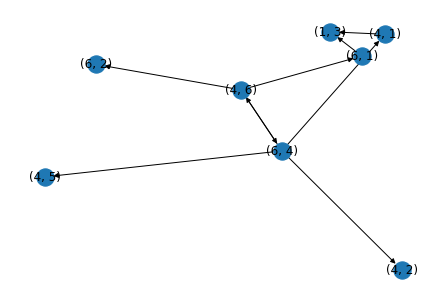

In [27]:
L = nx.line_graph(G)
nx.draw(L, with_labels=True)

13. The adjacency matrix of L:

In [28]:
M = nx.adjacency_matrix(L)
M.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0]])

14. M, B, and E are related by the formula $M = E^T\cdot B$:

In [31]:
np.array_equal(M.astype(float).todense(), (E.transpose() @ B).todense())

True